# <img src="./logo_UTN.svg" align="right" width="150" /> 

#### Teoría de Circuitos II

# Tarea Semanal 1

Autor: Lopez Cruz Juan Carlos


# Introducción

Durante la clase se analizaron 2 topoligias del tipo filtro Pasa Banda Pasivo como se puede ver en la imagen a continuacion.

<img src="./topologias_pasa_banda.png" /> 

donde el objetivo de esta tarea sera reemplazar el inductor de la Fig. 1 por un GIC como se ve a continuacion:

<img src="./pasa_banda_con_GIC.png" />

## Items a tratar del circuito:

1.  Analizar la impedancia de entrada desde el nodo Vx. Hallar los valores de R4,R5,Y1,Y2 e Y3 de tal manera que responda como un Inductor de valor unitario.

2.  Obtener la función transferencia $\frac{V2}{V1}$. Desnormalice convenientemente en frecuencia e impedancia para garantizar una $f0 = 10KHz$ y $Q = 20$ utilizando Capacitores entre 1 nF y 100 nF. Para los resistores no hay restricciones.

3.  Simule la transferencia desnormalizada en Python. Se sugiere programar la transferencia normalizada y definir las normas de frecuencia e impedancia para desnormalizar. Verificar los requerimientos pedidos en 2)

Bonous: Obtener los valores de R4 y R5 para obtener un Pasa Banda con +20 dB de ganancia en f0

## Resolucion:

### Calculo de la Impedancia de entrada Ze(s) desde el nodo Vx

Primero empezaremos a calcular la impedancia de entrada y cacular los componentes (Y1, Y2, Y3, R4 y R5) para que la impedancia de entra sea un inductor de valor unitario

In [2]:
from IPython.display import IFrame
IFrame("./calculo_Ze_ts1.pdf", width=1000, height=1000)

Con el desarrollo mostrado podemos concluir que para que nuestra impedacia de entrada se un inductor de valor unitario tenemos que tener los siguientes aspectos:

1.  Y1 e Y3 seran resistencias y de valor unitario (1Ω).

2.  R4 y R5 seran de valor unitario (1Ω).

3.  Y2 sera un capacitor de valor unitario (1F).

### Calculo de la transferencia H(s)

Ahora procederemos a calcular la funcion transferencia ($H(s)=\frac{V2}{V1}$) del circuito, donde usaremos el desarrollo efectuado en el anterior item algunas ecuaciones (Ec. 1 y Ec.3) para evitar calcularla de nuevo, ademas, por un tema de simplificidad diremos que el capacitor de la admitancia Y2 y el capacitor que no forma parte del GIC seran iguales.

In [26]:
from IPython.display import IFrame
IFrame("./transf_ts1.pdf", width=1000, height=600)

### Desnormalizacion de la transferencia H(s)

Primero cambiaremos las admitancias por terminos de impedancia y simplificaremos un poco mas nuestra funcion transferencia

\begin{equation}
H(s) = \frac{R4(\frac{1}{R4}+\frac{1}{R5})}{CR}\frac{s}{s^2+s\frac{1}{CR}+\frac{R4}{C^2R1R3R5}} 
\end{equation}

\begin{equation}
H(s) = \frac{1+\frac{R4}{R5}}{CR}\frac{s}{s^2+s\frac{1}{CR}+\frac{R4}{C^2R1R3R5}} 
\end{equation}

Procedemos a generalizar nuestra funcion transferncia por $\omega_0^2 = \frac{R4}{C^2R1R3R5}$ y $\frac{\omega_0}{Q} = \frac{1}{CR}$ quedando nuestra funcion transferencia de la siguiente manera:

\begin{equation}
H(s) = \frac{s\frac{\omega_0}{Q}(1+\frac{R4}{R5})}{s^2+s\frac{\omega_0}{Q}+\omega_0^2} 
\end{equation}

Donde si definimos a K como: $K = 1+\frac{R4}{R5}$ entonces nos queda:

\begin{equation}
H(s) = \frac{s\frac{\omega_0}{Q}K}{s^2+s\frac{\omega_0}{Q}+\omega_0^2} 
\end{equation}

Procedemos a normalizar nuestra trasferencia de tal forma que nos quede con una $f0 = 10KHz$ y $Q = 20$, por lo que empezamos a diseñar nuestra red, sabiendo que tenemos una limitacion en los capacitores, ya que estos tendran que tener un valor entre 1 nF y 100 nF

Primero decimos que los valores que podemos fijar son $C = 1, \omega_o = 1$ y $R1 = R5 = 1$, con estos componentes fijados nos queda que $\frac{1}{Q} = \frac{1}{R} \Rightarrow Q = R = 20$ y $\omega_o^2 = 1 = \frac{R4}{R3} \Rightarrow R3 = R4$, donde imponemos que $R3 = R4 = 9 \Rightarrow K = 10$ para qye de esta manera tengamos una ganancia de 20 db en f0, con todo esto tenemos normalizada nuestra funcion trasnferencia:

\begin{equation}
H(s) = \frac{s\frac{1}{20}10}{s^2+s\frac{1}{20}+1}
\end{equation}

Esto en la red quedaria de la siguiente manera:

In [74]:
from IPython.display import IFrame
IFrame("./red_normalizada_ts1.pdf", width=1000, height=400)

Ahora procederemos a desnormalizar nuestra red para obtener los valores de los componentes, sabemos que nuestra norma de frecuencia es $\Omega_w = \omega_0 = 2\pi f0 = 2\pi10KHz = 62,83K \frac{rad}{seg}$
asi que vamos a suponer que nuestro capacitor tiene 10 nF, lo cual nos un buen margen entre el rango que tenemos para elegir, por lo que si $C = 10 nF \Rightarrow 10 nF = \frac{1}{\Omega_w\Omega_z} \Rightarrow \Omega_z = 1591,54$, ya defenidos nuestras normas de frecuencia e impedancia procedemos a desnormalizar nuestros componentes:

$C = 10 nF$

$R = 20 \Omega_z = 31,83KΩ$

$R1 = R5 = \Omega_z = 1,59KΩ$

$R4 = R3 = 9 \Omega_z = 14,32KΩ$

### Simulacion de la transferencia en Python

Para finalizar simularemos nuestra funcion transferencia normalizada y desnormalizada.

In [80]:
import matplotlib as mpl
from matplotlib import pyplot as plt
#%%  Inicialización de librerías
mpl.rcParams['figure.figsize'] = (10,10)

# Modificamos el largo y ancho de la salida
fig_sz_x = 14
fig_sz_y = 13
fig_dpi = 80 # dpi

# tamaño de la tipografía
fig_font_size = 11

plt.rcParams.update({'font.size':fig_font_size})

# módulos numéricos y de funciones científicas
import numpy as np
from scipy import signal as sig

# Ahora importamos las funciones de PyTC2
from pytc2.sistemas_lineales import bodePlot, pzmap, GroupDelay, analyze_sys

Ya con nuestras librerias y funciones cargadas procedemos a simular primero nuestra transferencia normalizada

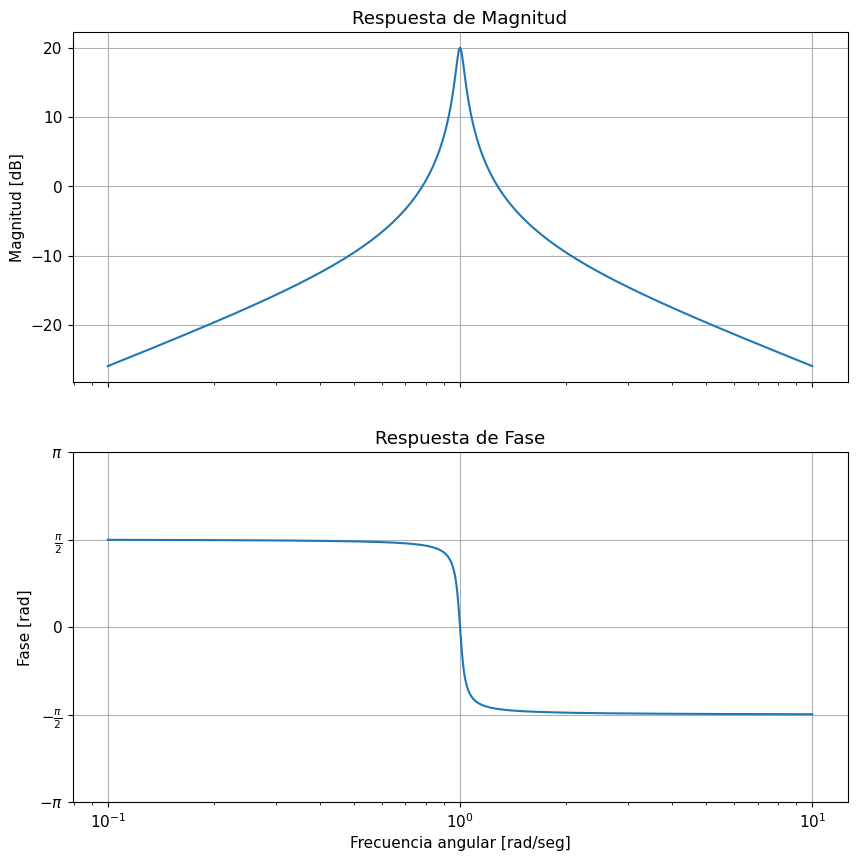

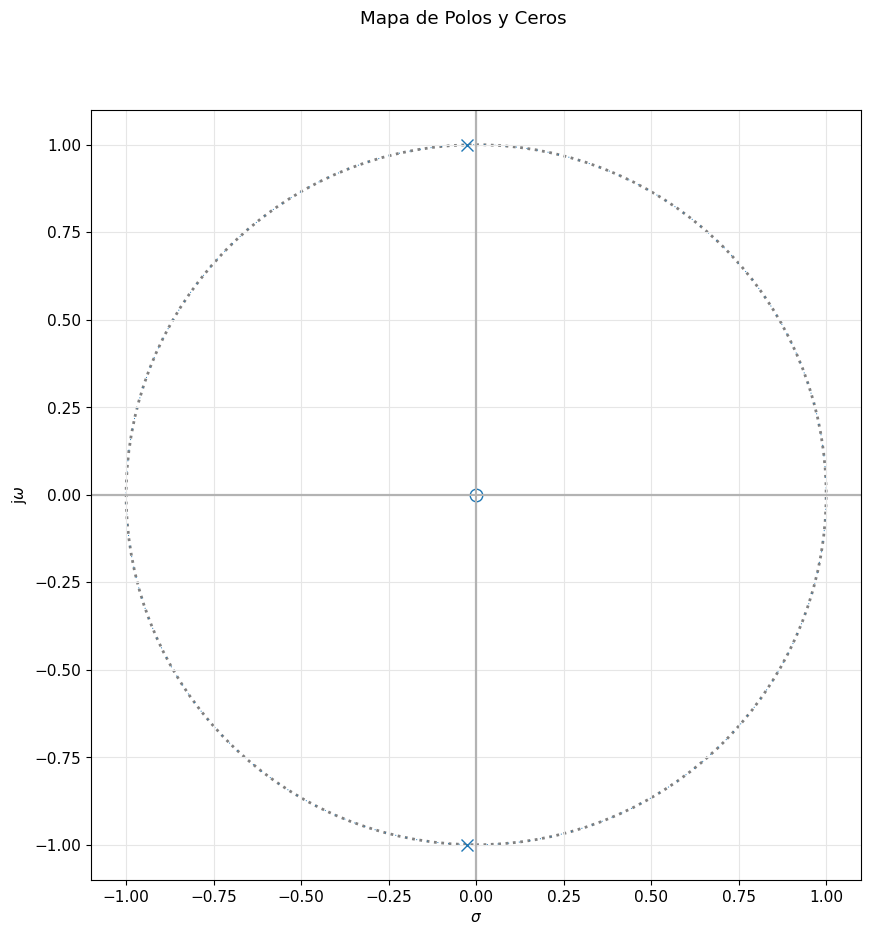

In [96]:
# Cargamos la funcion transferencia como vectores de sus coeficientes.

Q = 20

num = np.array([ 0.5, 0])
den = np.array([ 1, 1/Q, 1])

H1 = sig.TransferFunction( num, den )

# Graficamos el diagrama de polos y ceros
# Graficamos la respuesta en frecuencia para el modulo y la fase.

_, axes_hdl = bodePlot(H1)

# para que se vea como uno intuye el módulo. Probar comentar las siguientes 2 líneas
plt.sca(axes_hdl[0])
#plt.ylim([-1,1])

plt.gca

pzmap(H1)

plt.show()


Ahora simulamos nuestra transferencia desnormalizada

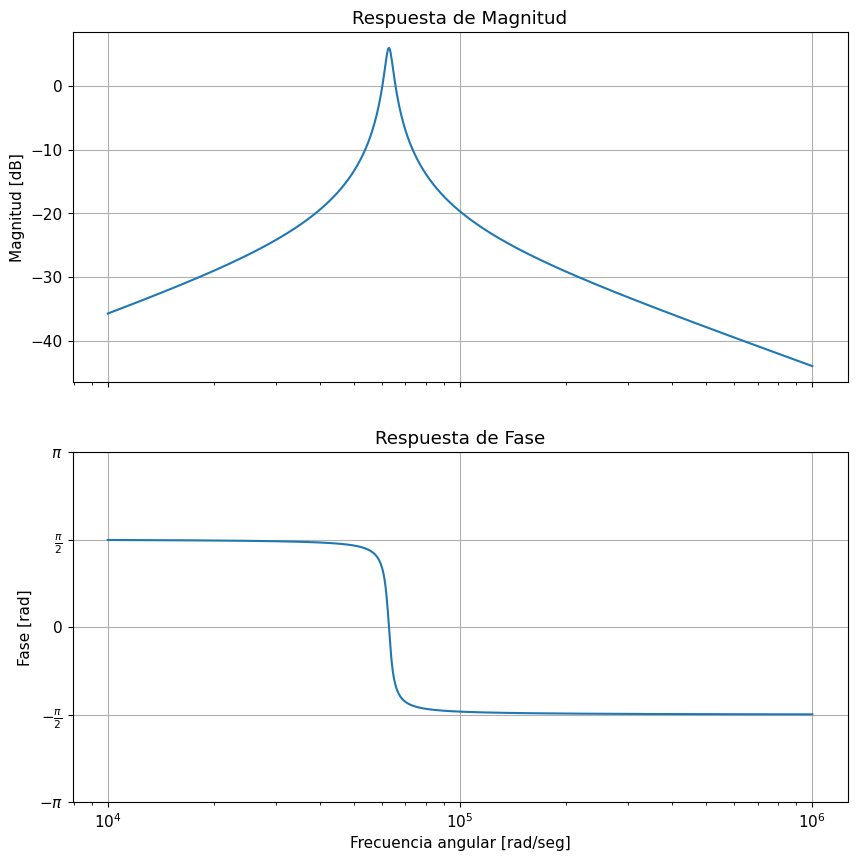

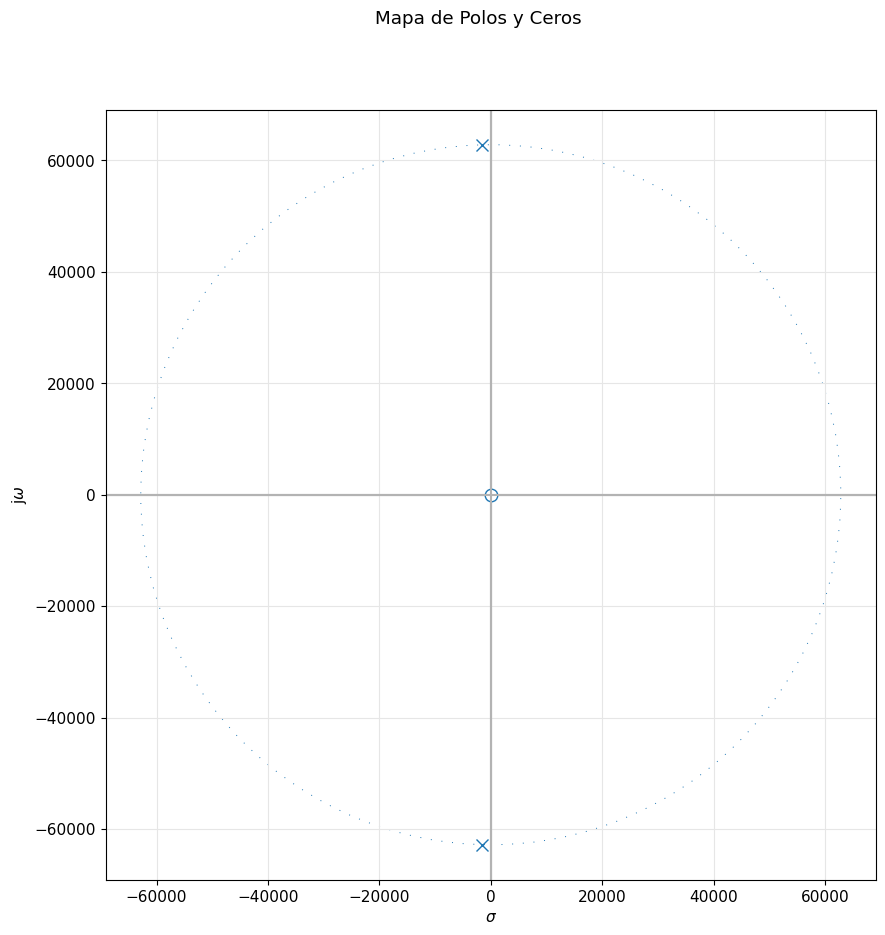

In [98]:
# Cargamos la funcion transferencia como vectores de sus coeficientes.

w0 = 2 * np.pi * 10**4
R4 = 14323.95
R5 - 1591.54
K = 1 + (R4/R5)

num = np.array([ (w0/Q) * K , 0])
den = np.array([ 1, w0/Q, w0**2])

H2 = sig.TransferFunction( num, den )

# Graficamos el diagrama de polos y ceros
# Graficamos la respuesta en frecuencia para el modulo y la fase.

_, axes_hdl = bodePlot(H2)

# para que se vea como uno intuye el módulo. Probar comentar las siguientes 2 líneas
plt.sca(axes_hdl[0])
# plt.ylim([-1,1])

plt.gca

pzmap(H2)

plt.show()
